## D213 Performance Assessment - Sentiment Analysis Using Neural Networks

**Name:** Coots, Anthony.<br />
**Affiliation:** Grad Student M.Sc Data Analytics.<br />
**Date:** `2024-06-12`<br />
**Version:** 1.2.0, r0.

### Introduction

"Throughout your career as a data analyst, you will assess continuing data sources for their relevance to specific research questions. Organizations use data sets to analyze their operations. Organizations may use these data sets in many ways to support their decision-making processes.

In your previous work, you explored a variety of supervised and unsupervised data mining models. You have seen the power of using data analysis techniques to help organizations make data-driven decisions, and you will now extend these models into areas of machine learning and artificial intelligence. In this course, you will explore the use of neural networks and natural language processing (NLP).

In this task, you will use the "[UCI Sentiment Labeled Sentences Data Set](https://archive.ics.uci.edu/dataset/331/sentiment+labelled+sentences)" in the Web Links section. You will build a neural network that is designed to learn word usage and context using NLP techniques. You will provide visualizations and a report, as well as build your network in an interactive development environment." 

*- WGU*

### Competencies

4030.7.1 : Constructing Neural Networks
- The graduate builds neural networks in the context of machine-learning modeling.

4030.7.3 : Natural Language Processing
- The graduate extracts insights from text data using effective and appropriate natural language processing (NLP) models.

<br />

### Table of Contents:
- [Research Question](#Research-Question-H)
    - [Research Question](#Research-Question)
    - [Objectives or Goals](#Objectives-or-Goals)
    - [Prescribed Network](#Prescribed-Network)
- [Data Preparation](#Data-Preparation)
    - [Data Exploration](#Data-Exploration)
    - [Tokenization](#Tokenization)
    - [Padding Process](#Padding-Process)
    - [Categories of Sentiment](#Categories-of-Sentiment)
    - [Steps to Prepare the Data](#Steps-to-Prepare-the-Data)
    - [Prepared Data Set](#Prepared-Data-Set)
- [Network Architecture](#Network-Architecture-H)
    - [Model Summary](#Model-Summary)
    - [Network Architecture](#Network-Architecture)
    - [Hyperparameters](#Hyperparameters)
- [Model Evaluation](#Model-Evaluation)
    - [Stopping Criteria](#Stopping-Criteria)
    - [Fitness](#Fitness)
    - [Training Process](#Training-Process)
    - [Predictive Accuracy](#Predictive-Accuracy)
- [Summary and Recommendations](#Summary-and-Recommendations)
    - [Code](#Code)
    - [Functionality](#Functionality)
    - [Recommendations](#Recommendations)
- [Reporting](#Reporting)
    - [Sources for Third-Party Code](#Sources-for-Third--Party-Code)
    - [Sources](#Sources)

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## Research Question<a name="Research-Question-H"></a>

### A1: Research Question <a name="Research-Question"></a>

*Summarize one research question, and the research question must be relevant to a realistic organizational situation and sentiment analysis*.

**Question**: "*How effectively can a neural network model, trained on the Yelp data set 'yelp_labelled.txt,' classify restaurant reviews into positive and negative sentiment categories*?"

### A2: Objectives or Goals <a name="Objectives-or-Goals"></a>

*Define each of the objectives or goals for the data analysis. Each goal must be reasonable/within scope of the research question*.

**Objectives**:<br />
- Obj.**1**: Preprocess the data.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The analysis will first prepare the Yelp review dataset for sentiment analysis by cleaning and preprocessing the text data so it is fit for neural network training. Methods such as tokenization, removal of stop words, and the normalization of text will be included.<br /><br />
- Obj.**2**: Develop a sentiment classification model.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The next objective is to design and train a neural network model to classify Yelp reviews with a reasonable accuracy. The reviews will be classified as positive or negative based on the text content. This will use a convolutional neural network (CNN) with dense layers and other hyperparameters will be the engine of this analysis.<br /><br />
- Obj.**3**: Evaluate the models performance.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Using metrics like accuracy and loss will evaluate the effectiveness of the neural network for classifying sentiments positive or negative.<br /><br />
- Obj.**4**: Visualize the results.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The analysis will include creating visualizations in order to detail the model's effectiveness for sentiment. Visualizations like confusion matrices will be implemented to show the true positives and negatives, and false positives and negatives.<br /><br />
- Obj.**5**: Report findings.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Lastly, the data analysis will summarize the results and insights gained from the model.<br /><br />

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

### A3: Prescribed Network <a name="Prescribed-Network"></a>

*Identify an industry-relevant type of neural network that can be trained to produce useful text classification predictions on text sequences*.

**Type**: *Convolutional Neural Network*.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Convolutional Neural Networks (CNNs) are known best for their ability to extract local features from data. This is key for text classification in order to determine sentiment of Yelp reviews. CNNs use filters to detect specific patterns of words to capture contextual distinctions for determining sentiment, like positive or negative. The CNN overall is a good fit for this analysis as it works with analyzing short but detail heavy text like what is seen in a common Yelp review. A small look into the sentiment analysis involves applying layers like "GlobalMaxPooling1D" from Python's library "tensorflow.keras.Layers" helps in getting the important features from the convolutional layers and reducing the dimensionality.<br /><br />
Sources I found useful:
- [d2l.ai, Chapter Natural Language Processing Applications: Sentiment Analysis](https://d2l.ai/chapter_natural-language-processing-applications/sentiment-analysis-cnn.html):<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Provides insight on using CNNs for natural language processing.<br /><br />
- [Machine Learning Mastery, Develop Word Embedding Model Predicting Movie Review Sentiment](https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/):<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Details the use of CNNs in a similar context to Yelp reviews (movies).

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## Data Preparation <a name="Data-Preparation"></a>

### B1: Data Exploration <a name="Data-Exploration"></a>

*Include exploratory data analysis on the chosen data set*.

In [1]:
# Required libraries for EDA.
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import re
import seaborn as sns

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

**Loading the Data**:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The analysis will begin by loading the data in the text file to a pandas DataFrame. The DataFrame will start with two columns, the review and the sentiment, positive or negative indicated as 1 or 0, respectively.

In [2]:
# DataFrame of txt file. File is tab-delimited.
df = pd.read_csv('yelp_labelled.txt', 
    delimiter = '\t', 
    header = None,
    names = ['Review', 'Sentiment']
)

In [3]:
df.head(3)

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0


<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

**Data Cleaning/Preprocessing**:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Data cleaning or data preprocessing for this analysis will include converting all reviews to a lowercase format and removing punctuation. That way, words like "Youre" or "you're" which contextually are the same, will both be normalized as "youre". Though not correct by means of spelling or use in a sentence, is correct for data exploration and analysis.

In [4]:
# lowercase text.
df['Review'] = df['Review'].str.lower()

# Remove punctuation.
df['Review'] = df['Review'].str.replace('[^\w\s]', '', regex = True)

In [5]:
df.head(10)

,Review,Sentiment
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1
5,now i am getting angry and i want my damn pho,0
6,honeslty it didnt taste that fresh,0
7,the potatoes were like rubber and you could te...,0
8,the fries were great too,1
9,a great touch,1


<br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

**Unusual Characters**:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Similar to the reasoning used in '*Data Cleaning/Preprocessing*,' unusual characters like emojis only add a complexity to the data that is undesired. The same goes for non-english characters as this analysis is english based. For example, using "Crépe" and "crépe" separately may dilute the results when translating both to "crepe" will mean the same for this analysis and not have separate dedicated words solely based on spelling given the nature of another language.

In [6]:
# Find special characters, including emojis.
def parse_review(review):
    emoji_char = re.findall(
        '[\U00010000-\U0010ffff]', 
        review, 
        flags = re.UNICODE
    )

    noneng_char = re.findall(
        '[^\x00-\x7F]',
        review,
    )

    return emoji_char, noneng_char

df['Non-standard Characters'] = df['Review'].apply(parse_review)
df[['Review', 'Non-standard Characters']]

# Calculate how many reviews contain emojis or non-English characters
df['Emoji'] = df['Non-standard Characters'].apply(lambda x: len(x[0]) > 0)
df['Non-English'] = df['Non-standard Characters'].apply(lambda x: len(x[1]) > 0)

print("Number of reviews containing emojis:", df['Emoji'].sum())
print("Number of reviews containing non-English characters:", df['Non-English'].sum())

Number of reviews containing emojis: 0
Number of reviews containing non-English characters: 4


In [7]:
df[df['Non-English'] > 0]

,Review,Sentiment,Non-standard Characters,Emoji,Non-English
150,my fiancé and i came in the middle of the day ...,1,"([], [é])",False,True
598,i really enjoyed crema café before they expand...,1,"([], [é])",False,True
823,the crêpe was delicate and thin and moist,1,"([], [ê])",False,True
915,the only thing i wasnt too crazy about was the...,0,"([], [é])",False,True


In [8]:
# Replace with an english e.
df['Review'] =df['Review'].str.replace('é', 'e')

# Drop the non-english and emoji columns from the DataFrame.
df = df.drop(columns = ['Non-standard Characters', 'Emoji', 'Non-English'])

In [9]:
df.head(3)

,Review,Sentiment
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0


<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

**Vocabulary Size**:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Using the nltk library, '*Natural Language Toolkit*' we use the 'punkt' package and stopwords in order to effectively determine the vocabulary size. First it is important to find the tokens in the review, tokens are text elements broken down into typical and meaningful words. The tokens are then filtered to remove stopwords. Stopwords are words like "the", "an", "in" and etcetera. When the tokens are filtered from stopwords, the tokens are move meaningful for model digestion as stopwords do not add much in terms of context, generally speaking. Individual words are then parsed into a word set, where the length of this set, called vocab, is presented. Vocabulary size has a direct impact on the complextion of NLP models when determining sentiment. For example, the more distinct vocabulary words, the more parameters which ultimately adds computational complexity when, for words like "the", "an" and so on do not contribute immensely.

In [10]:
# Stopwords are words like "the", "a", "in", etc...
nltk.download('punkt')
nltk.download('stopwords')

# Tokens are text elements broken down into typical/meaningful words.
df['Tokens'] = df['Review'].apply(word_tokenize)

# Filtered tokens are tokens not including stopwords.
df['Tokens_F'] = df['Tokens'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])

# Words used for calculating size.
word_set = [word for tokens in df['Tokens_F'] for word in tokens]

# Vocab set.
vocab = set(word_set)

# Vocabulary size.
print("Vocabulary Size:", len(vocab))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acoots\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acoots\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vocabulary Size: 1964


<br /><br /><br /><br /><br />

**Proposed Word Embedding Length**:

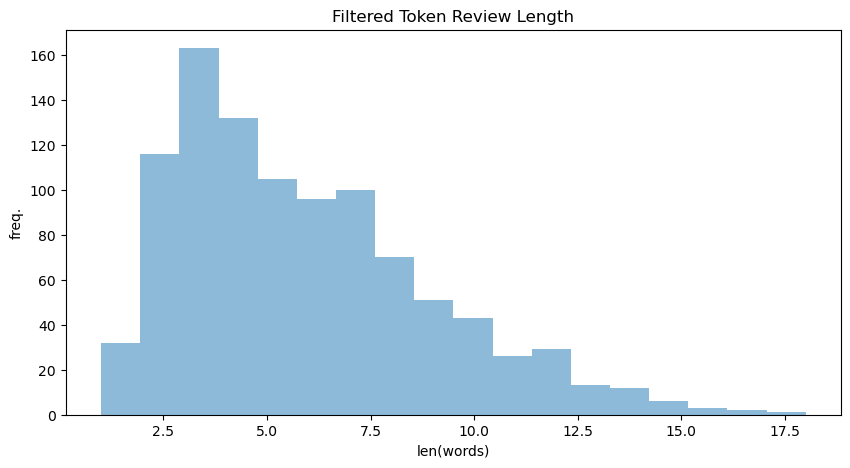

In [11]:
# Get the length of the filtered tokens.
df['Review Len'] = df['Tokens_F'].apply(len)

plt.figure(figsize=(10,5))
plt.hist(df['Review Len'], bins = 18, alpha = 0.5)
plt.title("Filtered Token Review Length")
plt.xlabel('len(words)')
plt.ylabel('freq.')
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Choosing the word embedding length is important as word embeddings are vector representations of words in dimensional space where the length refers to the dimensionality of the vectors. The embedding length essentially affects how much information each word captures about its' context and meaning. While there is varying agreement of an appropriate length, these lengths from what I have seen range anywhere from 50 to 400. For this analysis since the reviews are rather short, well keep the proposed word embedding length at 100, closer to 50 for the shorter review style and away from unnecessary length. It is important to avoid issues like overfitting where predictions are closer to examples only than the general nature of the data.

<br /><br /><br /><br /><br /><br />

**Statistical Justification for Maximum Sequence Length**:

In [12]:
st95 = df['Review Len'].quantile(0.95)
print("Maximum Sequence Length: " + str(st95))

Maximum Sequence Length: 12.0


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Maximum sequence length when performing text processing is the fixed length that all texts are padded/truncated to. This is so there is a standard length for the input data for batch processing. Too small of a length can be misleading and have a loss of information where alternatively if the length is too long then the computation may take longer or dilute important information. A statistical percentile of 95% aims to ensure that most of the data is retained without excessive length.

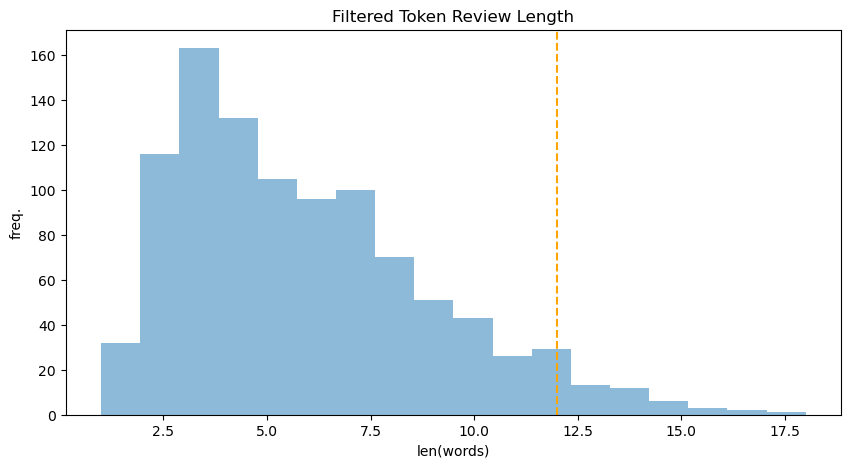

In [13]:
# Get the length of the filtered tokens.
df['Review Len'] = df['Tokens_F'].apply(len)

plt.figure(figsize=(10,5))
plt.hist(df['Review Len'], bins = 18, alpha = 0.5)
plt.title("Filtered Token Review Length")
plt.axvline(x = 12, color = 'orange', linestyle = '--')
plt.xlabel('len(words)')
plt.ylabel('freq.')
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This also seems to be supported visually in the histogram.

<br /><br />

### B2: Tokenization <a name="Tokenization"></a>

*Describe the goals of the tokenization process, including any code generated and packages that are used to normalize text during the tokenization process*.

**Goals**:<br />
- G.**1**: Text to tokens.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Break down natural language text into pieces called tokens, which are similar to words. This natural language processing task transforms the unstructured text into a format that can be analyzed.<br /><br />
- G.**2**: Standardization.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Normalizing the text such that there is a normal or uniform nature across the data by converting all characters to lowercase and all non-standard charcaters like 'é' to the english equivalent 'e'. This step was performed in B1.<br /><br />
- G.**3**: Processing.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Once the text is broken down into tokens, processing often includes filtering the tokens for stopwords. Stopwords are words such as "the", "an", "i" and so on that add more words to the analysis/model digestion than what is necessary.<br /><br />
- G.**4**: Model Accuracy.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Once the text is converted into tokens, models may learn easier about the structure and sentiment of the text for better analysis. Where ultimately, the best analysis possible is always a goal.<br /><br />

<br /><br /><br /><br />

**Code**:<br />
It is important to note that tokenization was taken care of in the prior documentation, B1, therefore the code will be provided, just commented out.<br /><br />
- L.**1**: NLTK (Natural Language Toolkit)<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;NLTK is a fundemental library used for natural language processing tasks, like tokenization. The 'punkt' model is a pre-trained model for tokenization.<br /><br />
- L.**2**: Pandas<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Pandas is a library useful for many different aspects of data science. Pandas was used for storing processed columns for identification of tokens, filtered tokens and normalized columns<br /><br />
- L.**3**: re (Regular Expressions)<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Regular expressions which is denoted as re, is used for parsing the text for emojis and non-english characters which we do not desire to keep for this analysis. Only non-english characters were found, and they were promptly updated with the english character equivalent. For example, 'é' to 'e' for crepe.

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

In [14]:
### NOTE: Code was executed in B1.

# Find special characters, including emojis.
# def parse_review(review):
#     emoji_char = re.findall(
#         '[\U00010000-\U0010ffff]', 
#         review, 
#         flags = re.UNICODE
#     )

#     noneng_char = re.findall(
#         '[^\x00-\x7F]',
#         review,
#     )

#     return emoji_char, noneng_char

# df['Non-standard Characters'] = df['Review'].apply(parse_review)
# df[['Review', 'Non-standard Characters']]

# Calculate how many reviews contain emojis or non-English characters
# df['Emoji'] = df['Non-standard Characters'].apply(lambda x: len(x[0]) > 0)
# df['Non-English'] = df['Non-standard Characters'].apply(lambda x: len(x[1]) > 0)

# print("Number of reviews containing emojis:", df['Emoji'].sum())
# print("Number of reviews containing non-English characters:", df['Non-English'].sum())

# Replace with an english e.
# df['Review'] =df['Review'].str.replace('é', 'e')

# Drop the non-english and emoji columns from the DataFrame.
# df = df.drop(columns = ['Non-standard Characters', 'Emoji', 'Non-English'])

# Stopwords are words like "the", "a", "in", etc...
# nltk.download('punkt')
# nltk.download('stopwords')

# Tokens are text elements broken down into typical/meaningful words.
# df['Tokens'] = df['Review'].apply(word_tokenize)

# Filtered tokens are tokens not including stopwords.
# df['Tokens_F'] = df['Tokens'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])

# Words used for calculating size.
# word_set = [word for tokens in df['Tokens_F'] for word in tokens]

# Vocab set.
# vocab = set(word_set)

# Vocabulary size.
# print("Vocabulary Size:", len(vocab))

### B3: Padding Process <a name="Padding-Process"></a>

*Explain the padding process used to standardize the length of sequences and include an explanation of where the padding occurs*.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Padding is used to standardize the lengths of text sequences so that the each of the sequences fit in a CNN model appropriately. Padding usually adds a character or token to extend the current sequence to the uniform length. There are two types of padding, pre-padding and post-padding where each add the padding characters or tokens at the beginning and end of the sequence, respectively.<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;From my topical research, CNNs do not have an immediate favorite for padding position, pre or post. However, post-padding seems to be the standard across most models therefore for this analysis that will be the method applied. This means that the padding characters/tokens will be added to the end of the sequence, please see the following code.

In [15]:
pip install keras -q

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install tensorflow -q

Note: you may need to restart the kernel to use updated packages.


In [17]:
# Import libraries for padding sequences.
from keras.preprocessing.sequence import pad_sequences

In [18]:
# Create a list with unique integers for each token.
inToken = [token for sublist in df['Tokens_F'] for token in sublist]

# Integers for tokens, starting at 1.
vocabulary = {token: i + 1 for i, token in enumerate(set(inToken))}

# Tokens and integers.
df['Tokens_i'] = df['Tokens_F'].apply(lambda x: [vocabulary[token] for token in x])

# Maximum sequence length = st95, the statistical measure from earlier.
maxlen = int(st95)

# Pad.
df['Sequences_P'] = list(pad_sequences(df['Tokens_i'], maxlen = maxlen, padding = 'post')) 

In [19]:
# Show filtered tokens referenced and sequences padded.
df[['Tokens_F', 'Sequences_P']].head(10)

,Tokens_F,Sequences_P
0,"[wow, loved, place]","[897, 1505, 1539, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,"[crust, good]","[1473, 1779, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,"[tasty, texture, nasty]","[1575, 395, 608, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,"[stopped, late, may, bank, holiday, rick, stev...","[246, 1786, 25, 118, 1673, 1133, 1959, 476, 15..."
4,"[selection, menu, great, prices]","[51, 1783, 1569, 1112, 0, 0, 0, 0, 0, 0, 0, 0]"
5,"[getting, angry, want, damn, pho]","[1646, 361, 299, 1025, 1672, 0, 0, 0, 0, 0, 0, 0]"
6,"[honeslty, didnt, taste, fresh]","[635, 241, 750, 1333, 0, 0, 0, 0, 0, 0, 0, 0]"
7,"[potatoes, like, rubber, could, tell, made, ah...","[196, 863, 1674, 1032, 1115, 1533, 1769, 1598,..."
8,"[fries, great]","[1951, 1569, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
9,"[great, touch]","[1569, 1485, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

### B4: Categories of Sentiment <a name="Categories-of-Sentiment"></a>

*Clearly and accurately identify how many categories of sentiment will be used and an appropriate fitting activation function for the final dense layer of the network*.

**Categories of Sentiment**: 2, positive and negative.<br />

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Binary sentiment analysis will be used to classify the sentiments as either positive or negative. This type of analysis is a basic form of sentiment analysis interested in good or bad feedback. Since the classification is binary, we will use the '*Sigmoid*' activation function that outputs a probability corresponding to the likeliness that input belongs to the positive classification, 1, and the negative classification 0 usually decided upon a threshold at 0.5. This is opposed to the '*Softmax*' activation function in the final dense layer that is used to determine the classification across multiple several classes.

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

### B5: Steps to Prepare the Data <a name="Steps-to-Prepare-the-Data"></a>

*Explain the steps to prepare the data for analysis and accurately include the size of the training, validation, and test split based on industry average. The steps relate to preparation for neural network models and NLP techniques*.

**Steps**:<br />
- S.**1**: Importing/Data cleaning.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The analysis started with cleaning the data with normalizing the strings to lowercase and removing punctuation. Additionally, sentiment was given it's own column.<br /><br />
- S.**2**: Tokenization.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Next, tokenization was applied to break the text into meaningful words/elements called tokens. This was done using NLTK, Natural Language Tokenization.<br /><br />
- S.**3**: Removing stopwords.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Then, words like "the", "and", "an" called stopwords, were removed as they may not contribute to the sentiment analysis. Filtering out stopwords was also done with NLTK.<br /><br />
- S.**4**: Vector creation.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Next, the text data were assigned unique integers that a neural network will be able to "understand" or process. This was done as a preliminary step to performing padding.<br /><br />
- S.**5**: Padding.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The standard length of an input sequence was applied, to size 12 where sequences were post-padded to meet this length requirement. This was performed with keras.preprocessing.sequence.<br /><br />
- S.**6**: Omitting unnecessary columns and splitting into data sets.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Columns like '*Sequences_P* and '*Sentiment*' should be kept for analysis and data set splits. '*Sequences_P*' contains the padded sequence of integers which is key for input into the model. '*Sentiment*' is our target variable that needs to be kept for training and evaluation. All other columns will be omitted in the cleaned data set and thus the data set will be split into training, validation, and test splits on 70%, 15% and 15%, respectively.

In [20]:
# Copy to cleaned DataFrame.
df_clean = df[['Sequences_P', 'Sentiment']].copy()

In [21]:
# Show cleaned DataFrame.
df_clean.head(10)

,Sequences_P,Sentiment
0,"[897, 1505, 1539, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1
1,"[1473, 1779, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0
2,"[1575, 395, 608, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0
3,"[246, 1786, 25, 118, 1673, 1133, 1959, 476, 15...",1
4,"[51, 1783, 1569, 1112, 0, 0, 0, 0, 0, 0, 0, 0]",1
5,"[1646, 361, 299, 1025, 1672, 0, 0, 0, 0, 0, 0, 0]",0
6,"[635, 241, 750, 1333, 0, 0, 0, 0, 0, 0, 0, 0]",0
7,"[196, 863, 1674, 1032, 1115, 1533, 1769, 1598,...",0
8,"[1951, 1569, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1
9,"[1569, 1485, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1


In [22]:
from sklearn.model_selection import train_test_split

# Split into 3 data sets, training (70%), validation (15%) and testing (15%).

# Split into 70% to train, 30% for validation and testing at 15% apiece.
X_train, X_split, y_train, y_split = train_test_split(df_clean['Sequences_P'], df_clean['Sentiment'], test_size = 0.3, random_state = 23)

# Split the 30% into 15% each (half) for validation and testing.
X_val, X_test, y_val, y_test = train_test_split(X_split, y_split, test_size = 0.5, random_state = 23)

In [23]:
X_train = np.array([np.array(seq, dtype=int) for seq in X_train])

In [24]:
y_train = np.array([np.array(seq, dtype=int) for seq in y_train])

In [25]:
X_test = np.array([np.array(seq, dtype=int) for seq in X_test])

In [26]:
y_test = np.array([np.array(seq, dtype=int) for seq in y_test])

In [27]:
X_val = np.array([np.array(seq, dtype=int) for seq in X_val])

In [28]:
y_val = np.array([np.array(seq, dtype=int) for seq in y_val])

In [29]:
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))
print("Combined:", len(X_train) + len(X_val) + len(X_test))
print("Total size prior to split:", len(df_clean))
df_clean

Training set size: 700
Validation set size: 150
Testing set size: 150
Combined: 1000
Total size prior to split: 1000


,Sequences_P,Sentiment
0,"[897, 1505, 1539, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1
1,"[1473, 1779, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0
2,"[1575, 395, 608, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0
3,"[246, 1786, 25, 118, 1673, 1133, 1959, 476, 15...",1
4,"[51, 1783, 1569, 1112, 0, 0, 0, 0, 0, 0, 0, 0]",1
...,...,...
995,"[584, 123, 894, 395, 1708, 0, 0, 0, 0, 0, 0, 0]",0
996,"[1537, 1594, 681, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0
997,"[1799, 315, 1681, 195, 226, 0, 0, 0, 0, 0, 0, 0]",0
998,"[1861, 1070, 1525, 584, 1748, 195, 1919, 1750,...",0


<br /><br /><br /><br />

### B6: Prepared Data Set <a name="Prepared-Data-Set"></a>

*Provide a copy of the fully prepared data set*.

In [30]:
# Export the cleaned/ready DataFrame to a csv.
df_clean.to_csv('prepared_yelp_dataset.csv', index = False)

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## Network Architecture <a name="Network-Architecture-H"></a>

### C1: Model Summary <a name="Model-Summary"></a>

*Provide the complete output of the model summary of the function from TensorFlow. The output should align with the type of network used*.

In [31]:
# Import list needed for CNN/Sentiment Analysis.
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.layers import Conv1D, Dense, Embedding, GlobalMaxPooling1D

In [32]:
# Define the model.
model = Sequential()

In [33]:
# Embed the model with input dimension (vocab size) and output (see Proposed Word Embedding Length).
model.add(Embedding(
    input_dim = len(vocab) + 1,
    output_dim = 100
))

In [34]:
# Convolutional layer.
model.add(Conv1D(filters = 16, kernel_size = 3, activation = 'relu', padding = 'same'))

In [35]:
# Global max pooling layer.
model.add(GlobalMaxPooling1D())

In [36]:
# Dense layers.
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [37]:
# Compile the model.
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [38]:
# Build the model.
model.build(input_shape=(None, maxlen))

In [39]:
# Display the model summary.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 12, 100)             │         196,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 12, 16)              │           4,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 16)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,605 (787.52 KB)

 Trainable params: 201,605 (787.52 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# For training efficiency and avoiding overfitting.
StoppingCriteria = EarlyStopping(monitor = 'val_accuracy', patience = 5)

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

### C2: Network Architecture <a name="Network-Architecture"></a>

*Discuss the number of layers, the types of layers, and the total number of parameters in the network*.

**Number/Type of Layers**: 5<br />
- L.**1**: Embedding Layer.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The embedding layer is used to transform each token into a dense vector of a fixed size. This is to capture the meaning of each token and is important for processing text into neural networks.<br /><br />
- L.**2**: Conv1D Layer.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This layer applies filtering to the input sequences. This layer aims to find local patterns from the sequences while capturing relationships between adjacent words.<br /><br />
- L.**3**: GlobalMaxPooling1D Layer.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This layer reduces the dimensionality of the data by selecting the max value from each feature dimension across the sequences lengths.This helps filter the important features freom the convolutional layer to simplify the data while retaining the important information.<br /><br />
- L.**4**: Dense Layer.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This layer serves as an interpretation with the features that are extracted from the convolution and global pooling layers. The layer utilizes ReLU to learn the more complex patterns found.<br /><br />
- L.**5**: Output (Dense) Layer.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The final layer that uses a sigmoid activation function in order to output the probability that the input has a positive classification.<br /><br />

**Number of Parameters**:<br />
- N.**1**: Embedding Layer.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;196,500 parameters.<br /><br />
- N.**2**: Conv1D Layer.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4,816 parameters.<br /><br />
- N.**3**: GlobalMaxPooling1D Layer.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0 trainable parameters.<br /><br />
- N.**4**: Dense Layer.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;272 parameters.<br /><br />
- N.**5**: Output (Dense) Layer.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;17 parameters.<br /><br />

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

### C3: Hyperparameters <a name="Hyperparameters"></a>

*Explain the choice of hyperparameters used*.

**Hyperparameters**:<br />
- E.**1**: Activation functions.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Rectified Linear Unit, ReLU, was used for computation efficiency and effectivity. ReLU is beneficial when converging during training and aims to not affect the gradients in a significant manner. ReLU is a common activation function used for neural network modeling which also played a role in its use-case. Sigmoid is an activation function used for binary classification mapping probability to a 0 or 1, positive or negative, respectively. The sentiment of this analysis is either positive or negative, thus the choice of the binary classification activation function.<br /><br />
- E.**2**: Number of nodes per layer.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The Conv1D has 16 filters which are seen as nodes as each one processes the input data (from the embedding layer, no nodes. The global layer also does not have nodes but feature maps.) The first dense layer also has 16 nodes and is the transformation from the GlobalMaxPooling1D layer. While the data set itself isn't entirely large, neither is the vocabulary size, the smaller number of nodes the better for computational efficiency as well as to avoid overfitting. The number of nodes, in theory, is enough to combine and interpret the embedded features and avoids complexity. The output layer, the second dense layer has 1 singular node as it is used for the final layer in order to perform binary classification, 0 or 1.<br /><br />
- E.**3**: Loss function.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Binary crossentropy, opposed to categorical crossentopy was chosen like other parts of this analysis, binary nature. The loss function measures the distance between the model's predicted probability and it's distribution of 0 or 1. Predictions must be aimed at being 0 or 1 and thus, binary crossentropy was selected.<br /><br />
- E.**4**: Optimizer.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Adaptive Moment Estimation, Adam, was selected as an industry-expectation. It adjusts it's learning rate throughout it's training unless stopped for alternative reasons. Specifically, this is beneficial as it aims to find the minimum of the loss function.<br /><br />
- E.**5**: Stopping criteria.<br /><br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;While not yet implemented as it is a training measure, early stopping is used to prevent overfitting. Overfitting, is data no longer being generalized, rather only based on specific example. With this criteria as seen above, if the validation accuracy does not improve for 5 epochs, then the training stops.<br /><br />
- E.**6**: Evaluation metric.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Accuracy is used for the detection of true positives and true negatives, arguably the simplest measure for evaluation. For binary classification, accuracy simply reflects the model's performance in accurately classifying.<br /><br />

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## Model Evaluation <a name="Model-Evaluation"></a>

### D1: Stopping Criteria <a name="Stopping-Criteria"></a>

*Discuss the impact of using stopping criteria to include defining the number of epochs*.

The stopping criteria was previously defined with the Python code below.

In [41]:
# For training efficiency and avoiding overfitting.
# StoppingCriteria = EarlyStopping(monitor = 'val_accuracy', patience = 5)

**Impact of Stopping Criteria**:<br />
- I.**1**: Prevent overfitting.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Overfitting is when a model learns both the pattern in the data and the noise too. Stopping criteria helps mitigate this by stopping training once the model's performance stops improving on a stored data set. By monitoring this with tools like EarlyStopping(), the metrics are watched for improvement and regression to ensure the model performs well on training, validation and testing data.
- I.**2**: Computer resources.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Training models, especially neural networks can be costly in computer resources and time. Early stopping reduces the number of epochs the model trains once it is clear that the further training is not generating better results as seen in the metrics.<br /><br />
- I.**3**: Defining the number of epochs.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Without using early stopping, the ideal number of epochs would have to be found manually which in itself costs plenty of human resource and time to avoid overfitting. The model should be training with just the right about of epochs to avoid wasting time and loss in performance.

<br /><br /><br /><br /><br />

In [42]:
# Training the model.
model_res = model.fit(
    X_train,
    y_train,
    validation_data = (X_val, y_val),
    epochs = 50,
    callbacks=[StoppingCriteria],
)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4800 - loss: 0.6928 - val_accuracy: 0.7400 - val_loss: 0.6832
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9521 - loss: 0.6596 - val_accuracy: 0.8267 - val_loss: 0.6605
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9695 - loss: 0.5983 - val_accuracy: 0.8200 - val_loss: 0.6068
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9731 - loss: 0.4768 - val_accuracy: 0.8067 - val_loss: 0.5160
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9793 - loss: 0.2859 - val_accuracy: 0.8400 - val_loss: 0.4342
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9884 - loss: 0.1367 - val_accuracy: 0.8133 - val_loss: 0.4154
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9938 - loss: 0.0713 - val_accuracy: 0.8200 - val_loss: 0.4246
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9991 - loss: 0.0315 - val_accuracy: 0.7933 - val_loss

<br /><br /><br /><br /><br /><br /><br /><br />

### D2: Fitness <a name="Fitness"></a>

*Assess the fitness of the model*.

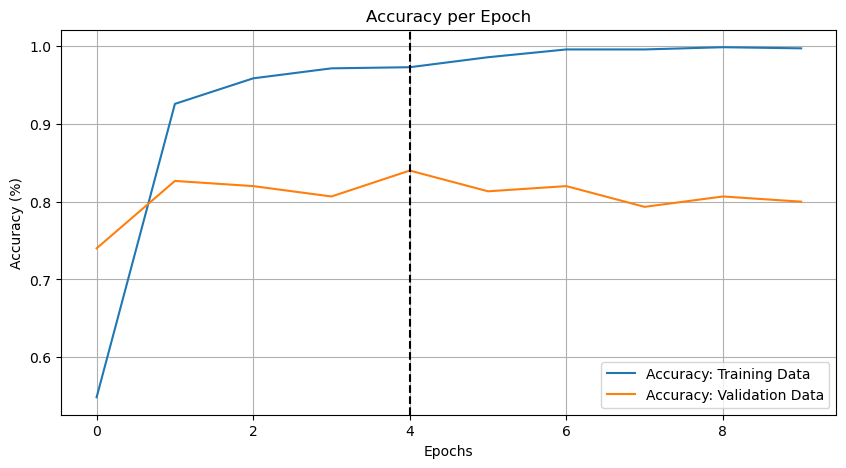

In [44]:
# Usual plot size, personally.
plt.figure(figsize=(10, 5))

# Plot accuracy of training and validation data.
plt.plot(model_res.history['accuracy'], label = 'Accuracy: Training Data')
plt.plot(model_res.history['val_accuracy'], label = 'Accuracy: Validation Data')

# Annotations.
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy per Epoch')
plt.axvline(x = 4, color = 'black', linestyle = '--')
plt.legend()
plt.grid(True)
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The training accuracy started off lower at ~50% but then quickly advanced to nearly 100% by the final epochs. The model has effectively learned the patterns in the training data which sums up 70% of the original data set. However, the validation accuracy stays at about ~80% for all epochs. This is about a ~15% drop off compared to the training data but is still fairly accurate. The dotted line at x = 4 is where early stopping comes to halt the training, from its patience of 5 so that there was no further improvement to validation accuracy to prevent overfitting.

### D3: Training Process <a name="Training-Process"></a>

*Provide visualizations of the model's training process, including a line graph of the loss and the chosen evaluation metric*.

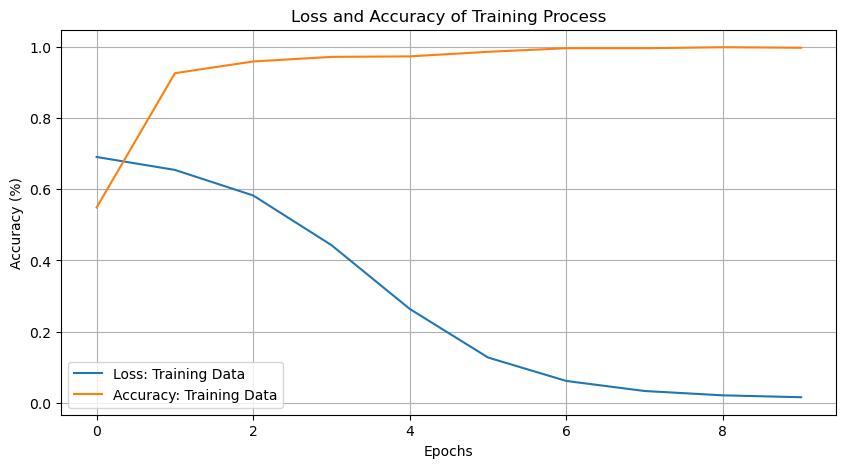

In [45]:
# Usual plot size, personally.
plt.figure(figsize=(10, 5))

# Plot accuracy of training data.
plt.plot(model_res.history['loss'], label = 'Loss: Training Data')

# Chosen evaluation metric.
plt.plot(model_res.history['accuracy'], label = 'Accuracy: Training Data')

# Annotations.
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Loss and Accuracy of Training Process')
plt.legend()
plt.grid(True)
plt.show()

<br /><br /><br /><br /><br /><br />

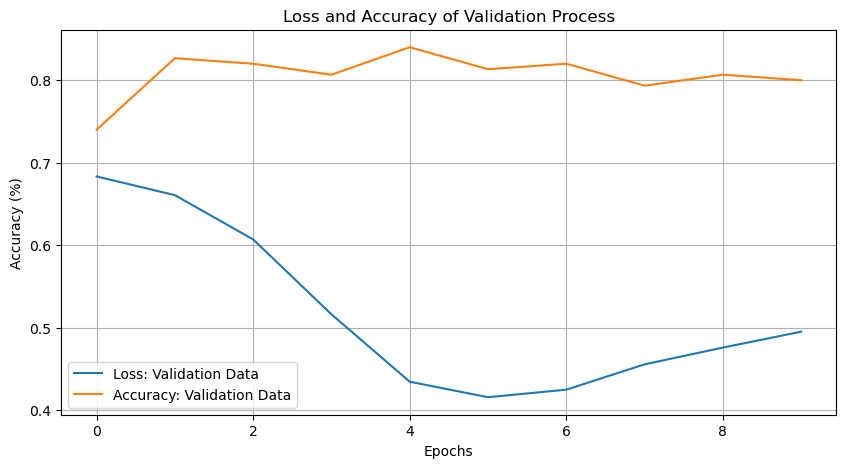

In [46]:
# Usual plot size, personally.
plt.figure(figsize=(10, 5))

# Plot accuracy of training data.
plt.plot(model_res.history['val_loss'], label = 'Loss: Validation Data')

# Chosen evaluation metric.
plt.plot(model_res.history['val_accuracy'], label = 'Accuracy: Validation Data')

# Annotations.
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Loss and Accuracy of Validation Process')
plt.legend()
plt.grid(True)
plt.show()

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

### D4: Predictive Accuracy <a name="Predictive-Accuracy"></a>

*Discuss the predictive accuracy of the trained network using the chosen evaluation metric from part D3*.

In [47]:
# Predictions of model.
predictions = model.predict(X_test)
prediction_classification = (predictions > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Metric to measure predictive accuracy.
test_accuracy = accuracy_score(y_test, prediction_classification)

In [49]:
# Print the accuracy.
print("Accuracy: ", str(test_accuracy))

Accuracy:  0.7733333333333333


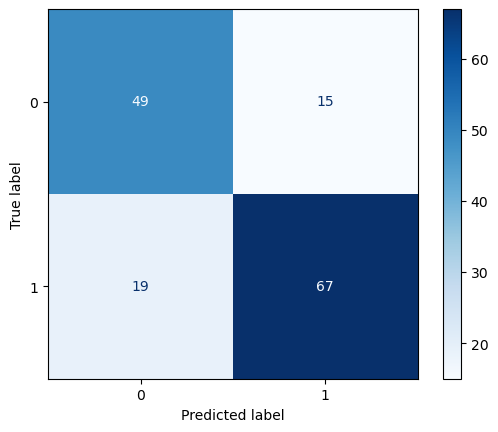

In [50]:
# Make a confusion matrix from y_test test data and the prediction classifications.
confusion_matrix = confusion_matrix(y_test, prediction_classification)

# Make a display instance for visual interpretation.
display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

# Show display.
display.plot(cmap = plt.cm.Blues)
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Predicitve accuracy is the measure of just how well the model's predictions are aligned with the actual outcomes. The predictive accuracy of this neural network has an accuracy of approximately 80%. This suggests that the model is reasonably accurate and correctly predicts the outcomes, or positive/negative classification when a review is given. The level of accuracy for only one instance of parameter tuning is promising, yet leaves room for improvement. To improve the model, parameter tuning should be further assessed.

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## Summary and Recommendations <a name="Summary-and-Recommendations"></a>

### E: Code <a name="Code"></a>

*Provide the code to save the trained network within the neural network*.

In [51]:
from tensorflow.keras.models import load_model

# Save the model to a model file.
model.save('Yelp_CNNs.h5')
model.save('Yelp_CNNs.keras')

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

### F: Functionality <a name="Functionality"></a>

*Discuss the functionality of the neural network, include the impact of the network architecture, the discussion should align with the research question*.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The neural network is designed to classify text data and the sentiment as told in Yelp restaurant reviews. By doing analysis into the language left in each review, the network predicts the sentiment, positive or negative in order to address the question in A1. Previously in A1, the analysis started with the question, "*How effectively can a neural network model, trained on the Yelp data set 'yelp_labelled.txt,' classify restaurant reviews into positive and negative sentiment categories?*"<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The neural network uses a Convolutional Neural Network (CNN) architechture which uses embedding, convolutional, pooling and dense layering components. Embedding layers transformed the text data into dense vectors of uniform size as required for neural networks. This captures the sentiment information of words in less space. Convulational layers were used to extract patterns from the embedded word vectors for the context of specific words. A pooling layer was used to reduce the dimensionality of the data for processing in the neural network. Lastly, dense layers were used to map the classification in order to decide the likeliness that a review is positive or negative.

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

### G: Recommendations <a name="Recommendations"></a>

*Recommend a course of action based on the results related to the research question*.

**Course of Action**:<br />
- R.**1**: Enhance the model.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Given the discrepency between the predicted and actual sentiments, tuning the model and training process is recommended. This could involve anything from changing the hyperparameters to trying new layer configurations. The higher the accuracy is the better the model is in determining the positive or negative sentiment of Yelp reviews.<br /><br />
- R.**2**: Get more data.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Expanding the data set with more Yelp reviews introduces a wider variety of texts that could be beneficial in training. Collecting more, but similar-esk data may assist in developing the model even further hopefully yielding higher accuracy.<br /><br />
- R.**3**: Review.<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Develop a routine for reviewing the performance of the model to ensure the accuracy remains high as new yelp review data is collected and social behavior changes over time.<br /><br />

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## Reporting <a name="Reporting"></a>

### Sources for Third-Party Code <a name="Sources-for-Third--Party-Code"></a>

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html<br /><br />
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html<br /><br />
WGU DataCamp Resource.

### Sources <a name="Sources"></a>

Brownlee, J. (2020, September 2). Deep Convolutional Neural Network for Sentiment Analysis (Text Classification). MachineLearningMastery.com. https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/<br /><br />
Dive Into Deep Learning. (n.d.). 16.3. Sentiment Analysis: Using Convolutional Neural Networks. 16.3. Sentiment Analysis: Using Convolutional Neural Networks - Dive into Deep Learning 1.0.3 documentation. https://d2l.ai/chapter_natural-language-processing-applications/sentiment-analysis-cnn.html<br /><br /> 
IBM. (2021, October 6). What are convolutional neural networks?. IBM. https://www.ibm.com/topics/convolutional-neural-networks<br /><br /> 
Kumar, S. G. (2022, September 1). A comparison of sentiment analysis models using NLP on Movie Reviews. Medium. https://medium.com/@sridhargkumar11/a-comparison-of-sentiment-analysis-models-using-nlp-on-movie-reviews-980bde64c646<br /><br />
WGU DataCamp Resource.